# RMSF

*/ Update July 2018 /*
by Alexis Salas-Burgos PhD

## MDAnalysis 
from https://www.mdanalysis.org

## MDTraj
from http://mdtraj.org

## PyTraj
from https://amber-md.github.io/pytraj/latest/index.html

## Prody
from http://prody.csb.pitt.edu

In [4]:
# Load Trajectory
import MDAnalysis as mda
import mdtraj as mdt
import pytraj as mdp
import prody as pd

In [19]:
DCD = "tutorial/ubq_wb_eq.dcd"
PSF = "tutorial/ubq_wb.psf"
PDB = "tutorial/ubq_wb.pdb"

Text(0,0.5,'RMSF ($\\AA$)')

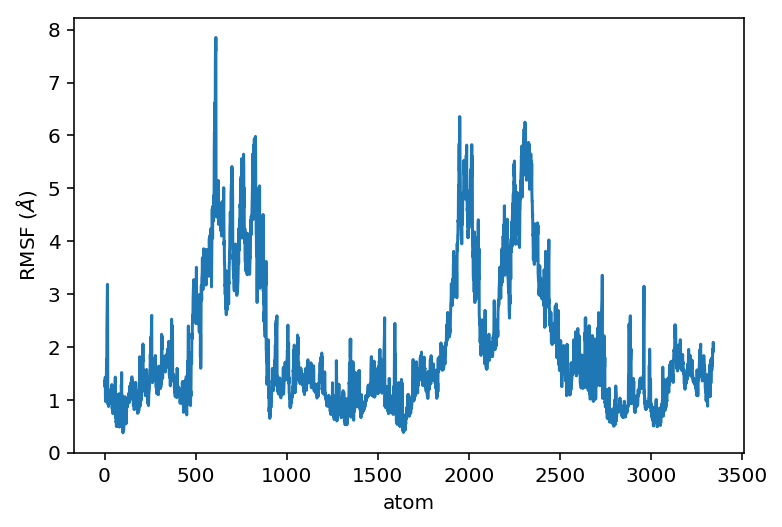

In [9]:
# PyTraj
# load trajectory
from MDAnalysis.tests.datafiles import PSF, DCD, PDB
import pytraj as mdp
p = mdp.load(DCD, PSF)

# superimpose to 1st frame
mdp.superpose(p, ref=0)

# compute rmsf
rmsf_data = mdp.rmsf(p)
rmsf_data

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
from matplotlib import pyplot as plt

plt.plot(rmsf_data.T[0], rmsf_data.T[1])
plt.xlabel('atom')
plt.ylabel('RMSF ($\AA$)')

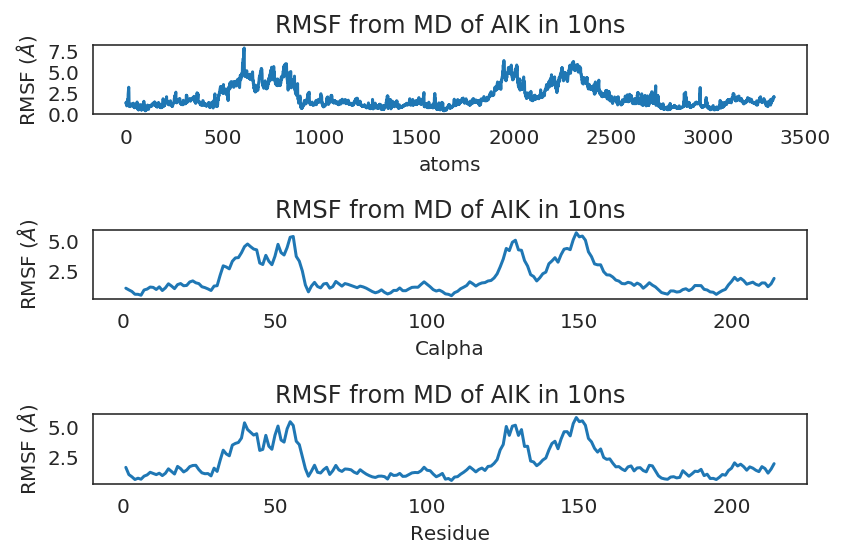

In [82]:
# PyTraj
# load trajectory
from MDAnalysis.tests.datafiles import PSF, DCD, PDB
import pytraj as mdp
p = mdp.load(DCD, PSF)

# modules to plot
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas

# RMSF all atom 
# # superimpose to 1st frame
mdp.superpose(p, ref=0)

# compute rmsf
rmsf_data = mdp.rmsf(p)

df = pandas.DataFrame({"atoms":rmsf_data.T[0],
                       "RMSF": rmsf_data.T[1]}
                     )
# RMSF calpha
rmsf_data2 = mdp.rmsf(p['@CA'])

df2 = pandas.DataFrame({"calpha":rmsf_data2.T[0],
                       "RMSF": rmsf_data2.T[1]}
                     )

# RMSF calpha
rmsf_data3 = mdp.rmsf(traj=p, mask='',
                      top=None, dtype='ndarray',
                      frame_indices=None, options='byres')

df3 = pandas.DataFrame({"residue":rmsf_data3.T[0],
                       "RMSF": rmsf_data3.T[1]}
                     )

# First subplot
with sns.axes_style("white"):
    plt.subplot(311)
    facet = sns.lineplot(data=df, x='atoms', y='RMSF')
    plt.xlabel('atoms')
    plt.ylabel('RMSF ($\AA$)')
    plt.title("RMSF from MD of AIK in 10ns")

with sns.axes_style("white"):
    plt.subplot(312)
    facet = sns.lineplot(data=df2, x='calpha', y='RMSF')
    plt.xlabel('Calpha')
    plt.ylabel('RMSF ($\AA$)')
    plt.title("RMSF from MD of AIK in 10ns")

with sns.axes_style("white"):
    plt.subplot(313)
    facet = sns.lineplot(data=df3, x='residue', y='RMSF')
    plt.xlabel('Residue')
    plt.ylabel('RMSF ($\AA$)')
    plt.title("RMSF from MD of AIK in 10ns")

plt.tight_layout()
plt.savefig("adk_rmsf.png", edgecolor='black', dpi=200, facecolor='black', transparent=True)

## DSPP Analysis

In [52]:
## PyTraj
from MDAnalysis.tests.datafiles import PSF, DCD, PDB
import pytraj as mdp
#traj = mdp.load_pdb_rcsb("1l2y")
traj = mdp.load(DCD, top=PSF)
residues, ss, _ = mdp.dssp(traj, mask=":2-10")#mask=range(100)

In [56]:
print(residues)
ss[0:3].tolist() # first frame

['ARG:2' 'ILE:3' 'ILE:4' 'LEU:5' 'LEU:6' 'GLY:7' 'ALA:8' 'PRO:9' 'GLY:10']


[['0', '0', '0', '0', '0', 'S', '0', '0', '0'],
 ['0', '0', '0', '0', '0', 'S', '0', '0', '0'],
 ['0', '0', '0', '0', '0', 'S', '0', '0', '0']]

In [35]:
## PyTraj
#from MDAnalysis.tests.datafiles import PSF, DCD, PDB
import pytraj as mdp
traj = mdp.load_pdb_rcsb("1l2y")
#traj = mdp.load(PDB, mask=":1-76")

residues, ss, _ = mdp.dssp(traj, simplified=True)#mask=range(100)
print(residues)
first_frame = ss[0].tolist() # first frame
last_frame  = ss[-1].tolist() # last frame
first_frame[:15]

['ASN:1' 'LEU:2' 'TYR:3' ... 'PRO:18' 'PRO:19' 'SER:20']


['C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'C', 'C', 'H', 'H', 'H', 'H', 'C']

In [30]:
def get_2dprofile(structure2D, value=-0.5):
    valsH = [None]
    for e in structure2D:
        if e == "H":
            valsH.append(value)
        else:
            valsH.append(None)
    
    valsS = [None]
    for e in structure2D:
        if e == "E":
            valsS.append(value)
        else:
            valsS.append(None)
    
    valsC = [None]
    for e in structure2D:
        if e == "C":
            valsC.append(value)
        else:
            valsC.append(None)
    #print valsH
    return valsH, valsS, valsC

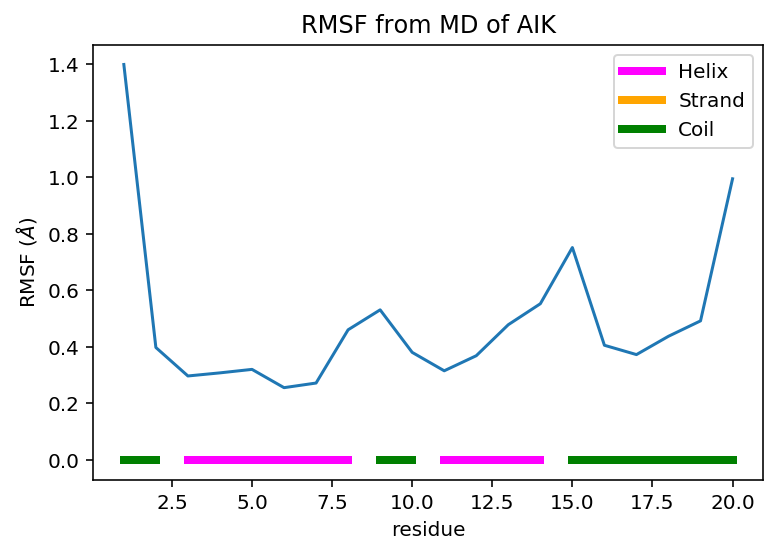

In [36]:
# PyTraj
# load trajectory
#from MDAnalysis.tests.datafiles import PSF, DCD, PDB
import pytraj as mdp
p = mdp.load(DCD, PSF)

# superimpose to 1st frame
mdp.superpose(traj, ref=0)

# compute rmsf
rmsf_data = mdp.rmsf(traj=traj, mask='@CA',
                      top=None, dtype='ndarray',
                      frame_indices=None, options='byres')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
from matplotlib import pyplot as plt

plt.plot(rmsf_data.T[0], rmsf_data.T[1])
plt.xlabel('residue')
plt.ylabel('RMSF ($\AA$)')
plt.title("RMSF from MD of AIK")

#Add DSSP
valsH, valsS, valsC = get_2dprofile(last_frame, value=0)
plt.plot(valsH, color='magenta', linewidth=4, label='Helix')
plt.plot(valsS, color='orange', linewidth=4, label='Strand')
plt.plot(valsC, color='green', linewidth=4, label='Coil')

plt.legend()
#plt.savefig('AIK_RMSF_DSSP.png', dpi=200)

In [37]:
## View pdb with beta color (PENDIENTE)
import nglview as nv
view = nv.show_pytraj(traj)
view._set_color_by_residue(colors="blue")
# reset representation
view

NGLWidget(count=38)

In [41]:
## Prody
import prody as pd
?pd.

Object `pd.dssp` not found.
